### 04. Pytorch Custom Dataset


How do you get your own data into Pytorch?

One of the ways to do so is via custom datasets

## Domain libraries
Depending on what you're working on, you'll want to look into each of the pytorch existing data loading functions and customizable data loading functions.

In [2]:
import torch
from torch import nn


In [3]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

### 1. Get data

Our dataset is a subset of Food101 dataset.
Food101 starts 101 different classes of food and 1000 images per class, 750 : training, 250 : testing.

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing)

Why do this?

When starting out ML projects, it's important to try things on small scale and then increase the scale when necessary. 
The whole point is to speed up how fast you can experiment.

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path('./data/')
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists.. skip downloading")
else:
    print(f'{image_path} doesnt exists, creating one..')
    image_path.mkdir(parents=True, exist_ok=True)
with open(data_path / "pizza_steak_sushi.zip" , 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip') 
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)



data\pizza_steak_sushi directory already exists.. skip downloading
Unzipping pizza, steak and sushi data...


### 2. Becoming one with data (data preparation)

In [5]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"tThere are {len(dirnames)} in directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

tThere are 2 in directories and 0 images in 'data\pizza_steak_sushi'.
tThere are 3 in directories and 0 images in 'data\pizza_steak_sushi\test'.
tThere are 0 in directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
tThere are 0 in directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
tThere are 0 in directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
tThere are 3 in directories and 0 images in 'data\pizza_steak_sushi\train'.
tThere are 0 in directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
tThere are 0 in directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
tThere are 0 in directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [7]:
train_dir = image_path  / "train"
test_dir = image_path / "test"
train_dir

WindowsPath('data/pizza_steak_sushi/train')

### 2.1 Visualizing images

Write some codes to:
1. Get all of the image paths
2. Pick a random image path using python''s random choice()
3. Get the imgage class name using `pathlib.Path.parent.stem`
4. Since we're working images, let's open the image with pythons PIL.
5. We'll then show the image and print metadata

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jpg'), WindowsPat

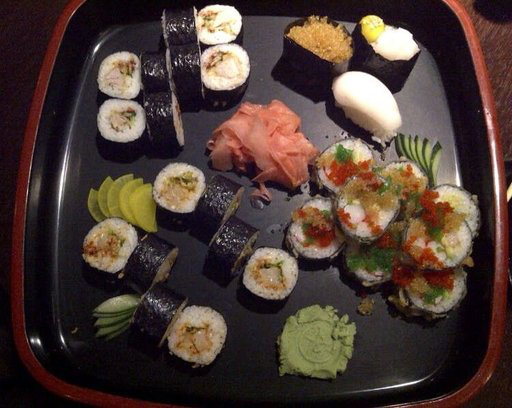

In [8]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list)

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image  path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height : {img.height}")
print(f"Image width: {img.width}")

img

(-0.5, 511.5, 407.5, -0.5)

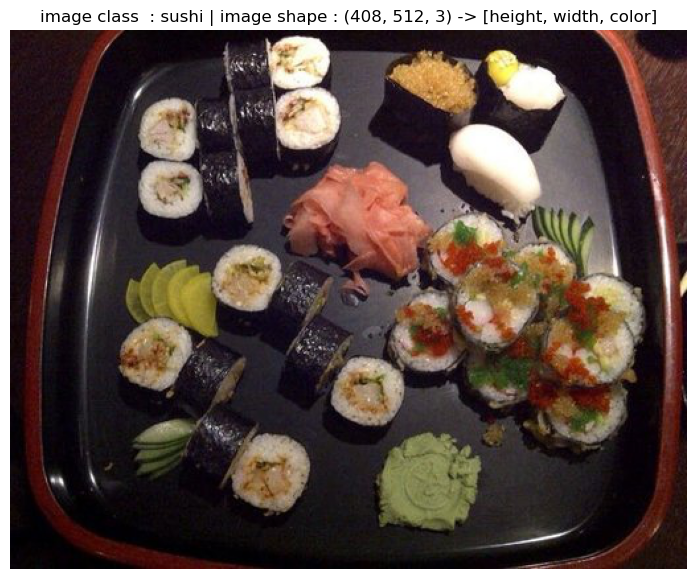

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with plt
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"image class  : {image_class} | image shape : {img_as_array.shape} -> [height, width, color]")
plt.axis(False)

### 3. Transforming data

Before we can use our image data with pytorch: 
1. Turn you target data into tensors .
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DatalLoader`

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### 3.1 Transforming data with torchvision.transforms


In [11]:
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our images to 64*64
    transforms.Resize(size = (64,64)),
    # Flip the images randomly on the horizental
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])






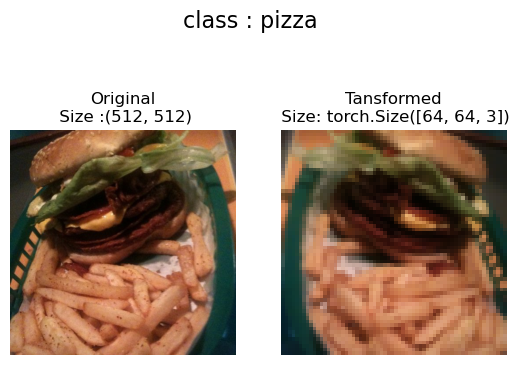

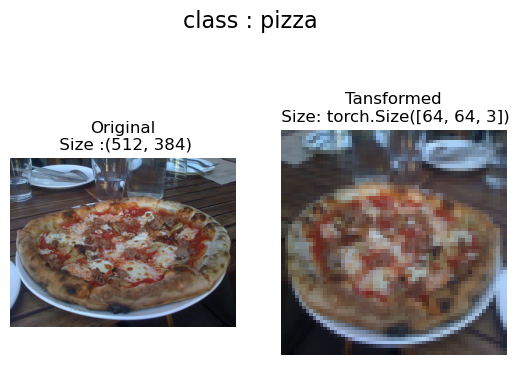

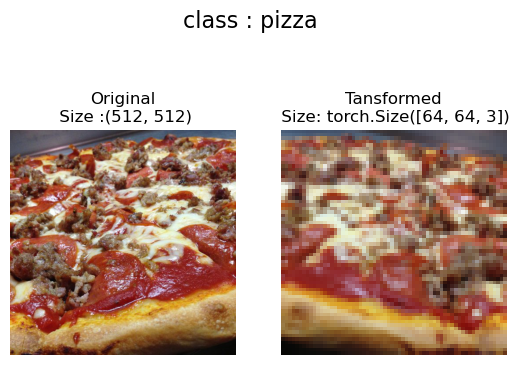

In [12]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    """
    selects random images from a path of images loads/transforms them then plots the original vs the tranformed version.
    """
    if seed:
        random.seed(42)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\n Size :{f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0) # change to (H,W,C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Tansformed\n Size: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"class : {image_path.parent.stem}",fontsize = 16)


plot_transformed_images(image_paths = image_path_list, transform=data_transform)


## 4. Option 1 : Loading image data using `imagefolder`

We can load image classification data using `torchvision.datasets.ImageFolder`

In [13]:
# Use ImageFolder to create datasets

from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir, transform = data_transform, target_transform = None)


test_data = datasets.ImageFolder(
    root = test_dir, transform=data_transform
)

In [14]:
# Get class names as list
class_names = train_data.classes
# Get class names as dict
class_dicts = train_data.class_to_idx

In [15]:
len(train_data), len(test_data)

(225, 75)

In [16]:
img, label = train_data[0]
class_names[label]

'pizza'

Text(0.5, 1.0, 'pizza')

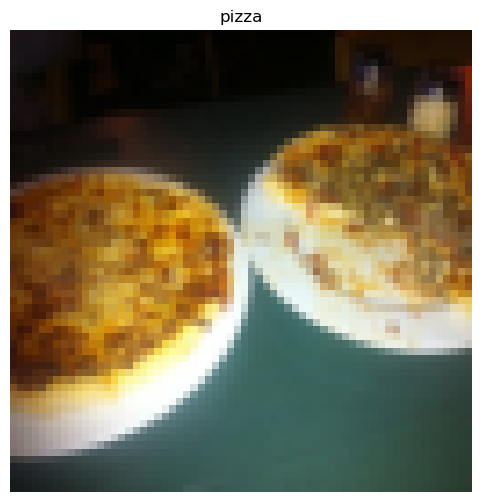

In [17]:
plt.figure(figsize=(10,6))
plt.imshow(img.permute(1,2,0))
plt.axis('off')
plt.title(class_names[label])

### 4.1 Turned loaded images into `DataLoader`'s 

A `DataLoader` is going to help us turn our `Dataset` 's into iterables and we can customize the `batch_size` so our model can see batch_size images at a time

In [18]:
import os
os.cpu_count()

# Num of cpu cores


6

In [19]:
# Turn train and test datasets into Dataloader
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(dataset= test_data, batch_size=BATCH_SIZE, num_workers=os.cpu_count(), shuffle=False)

In [20]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1 , you can change the batch size as you like

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]


### 5. option 2: Loading Image Data with a Custom Dataset

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the dataset

Pros: 
* Can create a `Dataset` out of almost anything
* Not limited to pytorch `pre-built` Dataset functions

Cons:
* Even though you could create `Dataset` out of almost anything, it doesn't mean it will work..
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues  

In [21]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict, List



In [22]:
# Instance of torchvision.datasets.ImageFolder()

train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory
2. Raise an error if the class names aren't found.
3. Turn the class names into a dict and a list and return them.

In [23]:
# Setup path for target directory

target_directory = train_dir
print(f"Target dir : {target_directory}")


# Get the class names from the target dir
class_name_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

Target dir : data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [24]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [25]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
  """Finds the class folder names in a target dir"""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}...")
  
  # 3. Create a dictionary of index labels
  class_to_idx = {class_name: i for i , class_name in enumerate(classes)}
  return classes, class_to_idx

find_classes(directory=target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as
well as a transform if we'd like to transform our data.
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer data
4. Create a function to `load_iamges()` , this function will open an image
5. Overwrite the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index

In [26]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset:
  def __init__(self, targ_dir : str, transform = None):
    # Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    # Create classes and class_to_idx
    self.classes, self.class_to_idx = find_classes(targ_dir)
  
  # 4. Create a function to load images
  def load_image(self, index:int)-> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)
  
  # 5. Overwrite the __len()__ method 
  def __len__(self) -> int : 
    return len(self.paths)
  
  # 6. Overwrite the __getitem__
  def __getitem__(self,index : int) ->Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X,y)"
    img  = self.load_image(index)
    class_name = self.paths[index].parent.name 
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [27]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [28]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform= train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transforms)

In [29]:
train_data_custom.transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.

2. To prevent the display getting out of hand, let's cap the num of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib

In [30]:
# 1. Create a function to take in a dataset

def display_random_images(dataset : torch.utils.data.dataset, classes:List[str] = None, n: int=10, display_shape : bool=True , seed:int=None):
  # 2. Adjust display if n is too high.
  if n>10:
    n=10
    display_shape = False
  
  # 3. Set the seed
  if seed:
    random.seed(seed)
  
  # 4. Get random sample indexes
  random_sample_idx = random.sample(range(len(dataset)), k=n)
  
  # 5. Setup plot
  plt.figure(figsize =(16,8))


  # 6. Loop through the random sample images and plot them
  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample]

    # 7. Adjust tensor dims for plot
    targ_image_adjust = targ_image.permute(1,2,0)
    
    # Plot adjusted images
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class : {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape : {targ_image_adjust.shape}"
    plt.title(title)

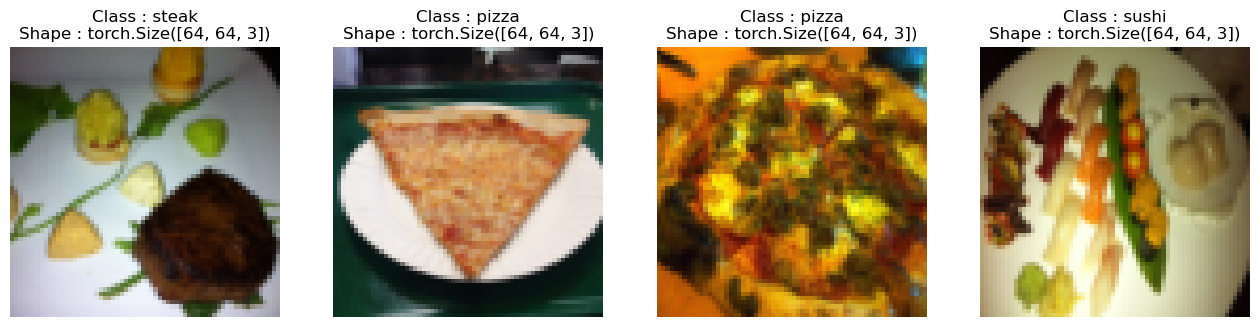

In [31]:
display_random_images(dataset=test_data_custom, n=4, classes=class_names, seed = None)

### 5.4 Turn custom laoded images into `DataLoader`'s

In [32]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom  = DataLoader(dataset = train_data_custom, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_dataloader_custom = DataLoader(dataset = test_data_custom, batch_size = BATCH_SIZE, shuffle=False, num_workers=0)

In [33]:
# Get image and label from custom dataloader
img_custom, label_custom  = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### 6. Other transforms and Data augmentation

In [34]:
### Let's look at TrivialAugment

from torchvision import transforms

train_transform =  transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.ToTensor()
])

In [35]:
data_path = pathlib.Path('./data')
image_path = data_path / "pizza_steak_sushi"
image_path

WindowsPath('data/pizza_steak_sushi')

In [36]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

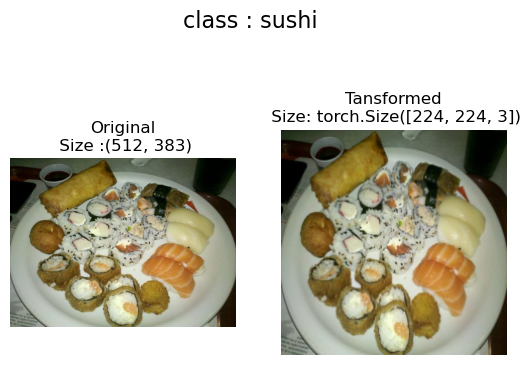

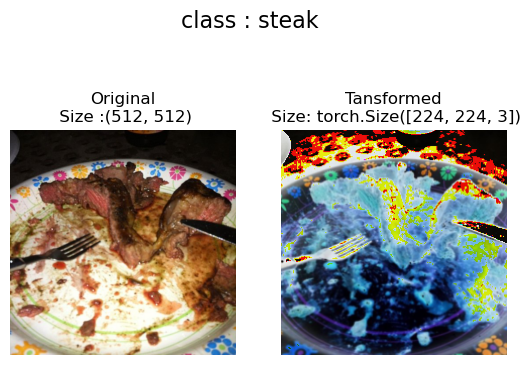

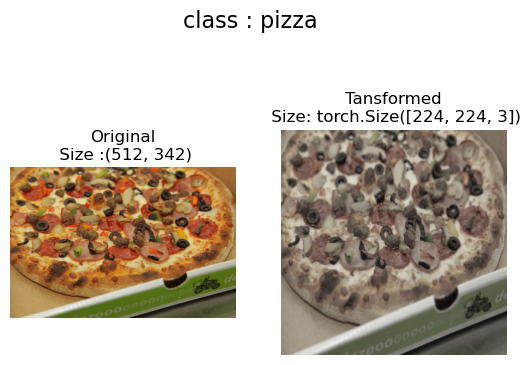

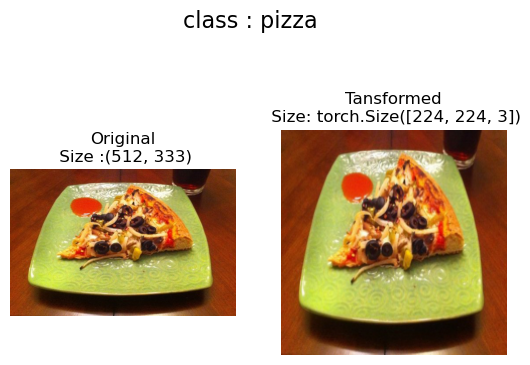

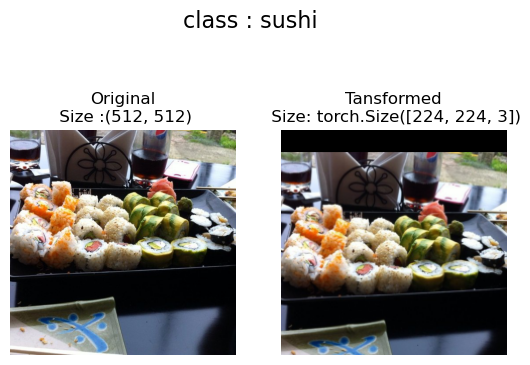

In [37]:
# Plot random transformed images
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transform,
    n=5, 
    seed = None
)

### 7. Model 0: TinyVGG with out data augmentation

### 7.1 Creating transfomrs and loading data for model 0

In [154]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [155]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [156]:
import torchvision
train_data_simple = torchvision.datasets.ImageFolder(root = train_dir, transform = simple_transform)
test_data_simple = torchvision.datasets.ImageFolder(root = test_dir, transform=simple_transform)
train_dataloader_simple = torch.utils.data.DataLoader(dataset=train_data, batch_size=32, shuffle=True,num_workers=0)
test_dataloader_simple = torch.utils.data.DataLoader(dataset = test_data, batch_size = 32, shuffle=False, num_workers=0)

### 7.2 Create TinyVGG model class

In [157]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int) -> None:
    super().__init__()
    self.conv_block1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, stride=1, padding=1, kernel_size=3),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, stride=1, padding=1, kernel_size=3),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride = 2)
    )
    self.conv_block2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, stride=1, padding=1, kernel_size=3),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, stride=1, padding=1, kernel_size=3),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride = 2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(hidden_units*8*8*4, output_shape)
    )
  
  def forward(self, x):
    return self.classifier(self.conv_block2(self.conv_block1(x)))


In [158]:
img,label = train_data[0]


In [159]:
img = img.to(device)
next(iter(img)).device

device(type='cuda', index=0)

In [160]:
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [161]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
from torchinfo import summary
summary(model_0,input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 7.5 Create train and test loops functions

* `train_step()` - takes in a model and dataloader, trains the model on the dataloader.
* `test_step()` - takes in a model and dataloader, evaluates the model on the dataloader.

In [162]:
def train_step(model : torch.nn.Module, 
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module, optimizer : torch.optim.Optimizer,
               device:None = device):
    # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0,0

    # Loop through data loader data batches
    for batch, (X,y) in enumerate(dataloader):
        # Send data to the target device
        X, y= X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Cal the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer.zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer.step
        optimizer.step()

        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc        

In [163]:
def test_step(model: torch.nn.Module, dataloader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module, device :None = device):
    # put model in eval mode
    model.eval()
    
    # Setup loss and accuracy
    test_loss, test_acc = 0,0

    # turn on inference mode
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X,y) in enumerate(dataloader):
            # Send data to the target device
            X,y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Cal the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Cal the accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels==y)).sum().item()/len(test_pred_labels)
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Creating a train() and test() using train_step() and test_step()

In [164]:
from tqdm.auto import tqdm


# 1. Create a train function that takes in various model parameters + optimizmers + dataloaders
def train(model : torch.nn.Module, train_dataloader : torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer, loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
          epochs:int = 5, device:None = device):
    # 2. Create empty results dictionary

    results ={
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model= model,dataloader = train_dataloader, loss_fn=loss_fn,
                                           optimizer=optimizer, device=device)
        test_loss, test_acc = test_step(model = model,dataloader=test_dataloader, 
                                        loss_fn = loss_fn, device= device)
        
        # 4. Print out what's happening
        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)
        results["test_loss"].append(test_loss)
    
    # 6. return results
    return results

In [241]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set epochs
epochs = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model = model_0, train_dataloader= train_dataloader_simple,
                        test_dataloader =test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=epochs)


end_time = timer()
print(f"Total training time : {end_time-start_time:.3f} sec")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1074 | Train acc: 0.2500 | Test loss: 1.1366 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0846 | Train acc: 0.4062 | Test loss: 1.1650 | Test acc: 0.1979
Epoch: 2 | Train loss: 1.1221 | Train acc: 0.2930 | Test loss: 1.1706 | Test acc: 0.1979
Epoch: 3 | Train loss: 1.1218 | Train acc: 0.2930 | Test loss: 1.1420 | Test acc: 0.3333
Epoch: 4 | Train loss: 1.0955 | Train acc: 0.3633 | Test loss: 1.0886 | Test acc: 0.2708
Total training time : 14.909 sec


### 7.8 Plot loss curve of Model 0

In [242]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [243]:
def plot_loss_curves(results: Dict[str,List[float]]):
    "Plots loss curve"
    # Get the loss values of the results dictionary
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    
    # Get the accuracy values of the results dictionary
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    
    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))
    
    # Setup a plot
    plt.figure(figsize = (15,7))

    # Plot the loss
    plt.subplot(1,2,1)
    plt.plot(epochs,loss, label = "train_loss")
    plt.plot(epochs, test_loss, label = "test_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot the acc
    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy, label = "train_accuracy")
    plt.plot(epochs, test_accuracy, label = "test_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

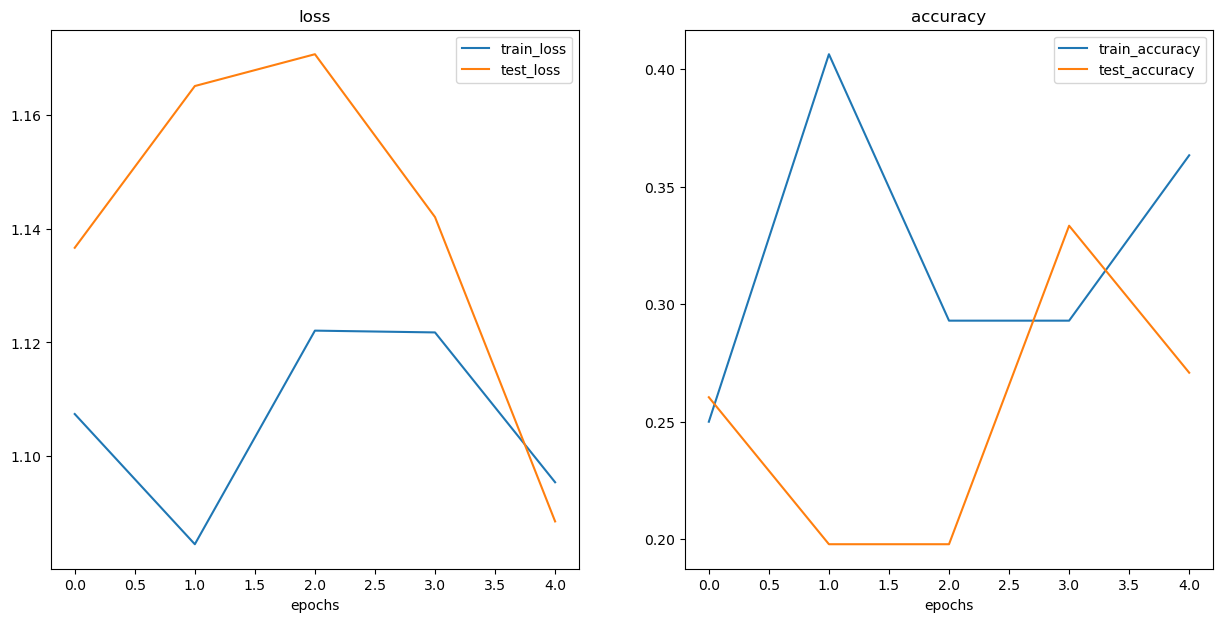

In [244]:
plot_loss_curves(model_0_results)

### 8. What should an ideal loss curve look like?

### 9. Model 1: TinyVGG with Data Augmentation

### 9.1 Create transform with data augmentation

In [245]:
# Create training transform with TrivialAugment
train_transform_trivial = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

### 9.2 Create train and test `Dataset` and `DataLoader` with data augmentation

In [226]:
# turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root = train_dir, transform = train_transform_trivial)
test_data_augmented = datasets.ImageFolder(root = test_dir, transform=test_transform_simple)

In [227]:
# Turn our Datasets into DataLoaders
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset = train_data_augmented, batch_size= BATCH_SIZE, shuffle=True, num_workers=0)
test_dataloader_simple = DataLoader(dataset = test_data_augmented, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

### 9.3 Construct and train model 1

In [228]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data_augmented.classes)).to(device)


In [229]:
# Set random seeds
torch.cuda.manual_seed(42)
torch.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Setup loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model 1
model_1_results = train(model = model_1, train_dataloader = train_dataloader_augmented,
                        test_dataloader= test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)
end_time = timer()
print(f"Total training time for model_1 : {end_time-start_time:.3f} sec")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1067 | Train acc: 0.2422 | Test loss: 1.1080 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0752 | Train acc: 0.4258 | Test loss: 1.1520 | Test acc: 0.2604
Epoch: 2 | Train loss: 1.1454 | Train acc: 0.3047 | Test loss: 1.1646 | Test acc: 0.2604
Epoch: 3 | Train loss: 1.0904 | Train acc: 0.4258 | Test loss: 1.1012 | Test acc: 0.2604
Epoch: 4 | Train loss: 1.1027 | Train acc: 0.3047 | Test loss: 1.0947 | Test acc: 0.2604
Total training time for model_1 : 19.503 sec


In [237]:
model_1_results

{'train_loss': [1.1066749840974808,
  1.0752167701721191,
  1.1454082429409027,
  1.0904133766889572,
  1.1027362048625946],
 'train_acc': [0.2421875, 0.42578125, 0.3046875, 0.42578125, 0.3046875],
 'test_loss': [1.1079668203989665,
  1.1520121892293294,
  1.1645586490631104,
  1.101210355758667,
  1.094693620999654],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667]}

### 9.4 Plot the loss curves of model 1
A loss curve helps you evaluate your models performance overtime

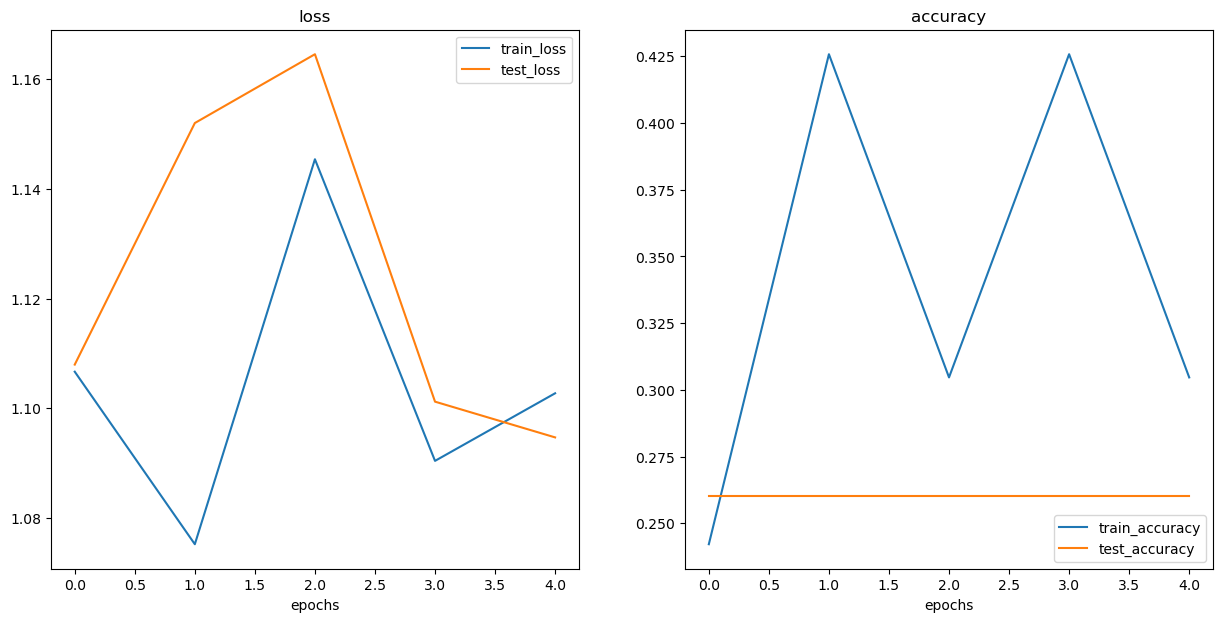

In [238]:
plot_loss_curves(model_1_results)

### Compare model results

There's a few different ways:
1. Hard coding
2. Pytorch + Tensorboard
3. Weight and biases
4. MLFlow

In [246]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df['train_loss']

0    1.107435
1    1.084571
2    1.122079
3    1.121763
4    1.095451
Name: train_loss, dtype: float64

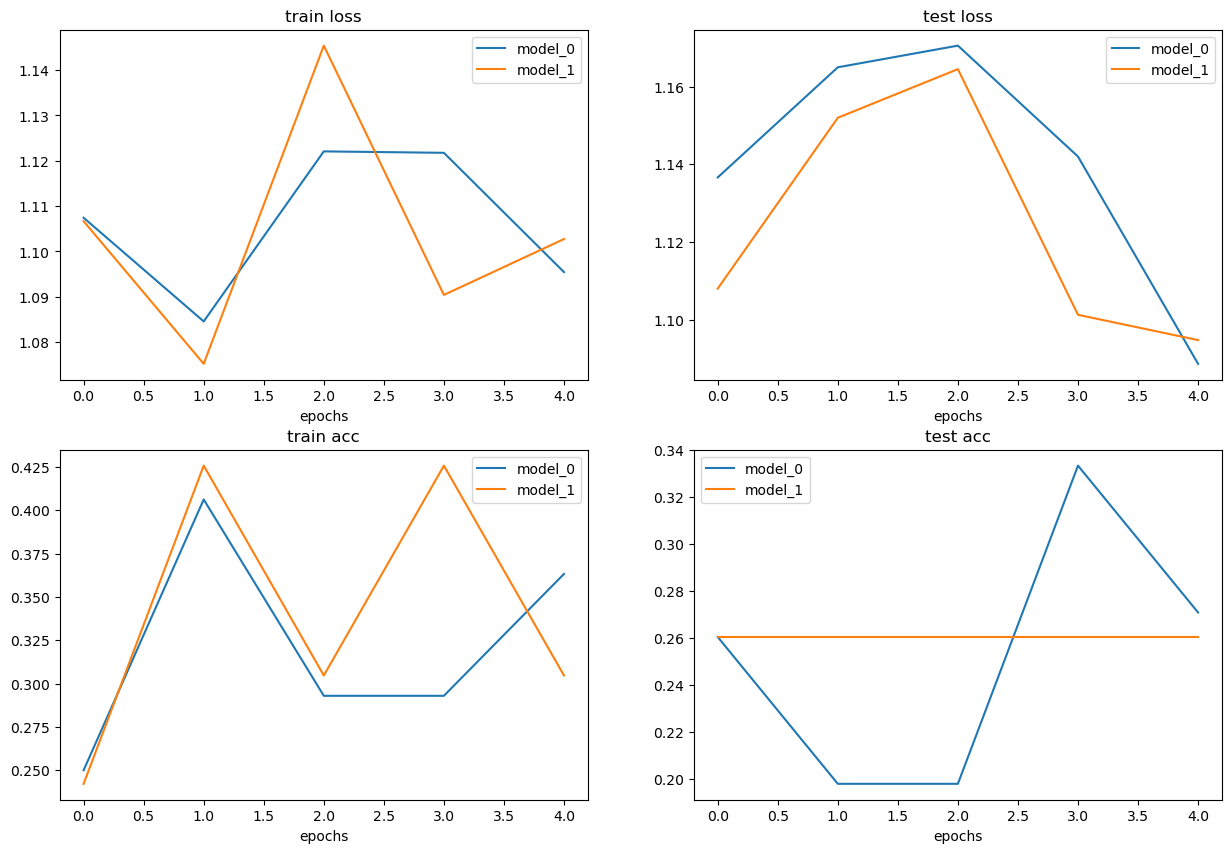

In [248]:
# Setup 
plt.figure(figsize = (15,10))

# Get num of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2,2,1)
plt.plot(epochs,model_0_df["train_loss"],label="model_0")
plt.plot(epochs, model_1_df["train_loss"],label = "model_1")
plt.title("train loss")
plt.xlabel("epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["test_loss"],label="model_0")
plt.plot(epochs, model_1_df["test_loss"],label = "model_1")
plt.title("test loss")
plt.xlabel("epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"],label  ="model_0")
plt.plot(epochs, model_1_df["train_acc"],label = "model_1")
plt.title("train acc")
plt.xlabel("epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"],label  ="model_0")
plt.plot(epochs, model_1_df["test_acc"],label = "model_1")
plt.title("test acc")
plt.xlabel("epochs")
plt.legend()

### 11. Making a prediction on a custom image

Although we've trained a model on custom data... how do you make a prediction on a sample/image that's not in entire dataset.

In [249]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path,"wb") as f:
        # When downloading from Github, need to use the "raw" file link
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg")
        f.write(request.content)

else:
    print(f"{custom_image_path} already exists, skipping")

### 11.1 Loading in a custom image with Pytorch

We have to make sure our custom image is in the same format as the data our model was trained on.

* (torch.float32)
* (64,64,3)
* On the right device

We can read an image into Pytorch using torchvision.io.read_image

In [263]:
import torchvision

# Read in custom image
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) /255.
custom_image

tensor([[[0.6039, 0.6863, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6549, 0.7059,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6706,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7412, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7098, 0.7608,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7255,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4157, 0.4078, 0.4000],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4118, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4588, 0.5412, 0.5686,  ..., 0.0667, 0.0549, 0.0392],
         [0.4275, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

torch.Size([3, 4032, 3024])

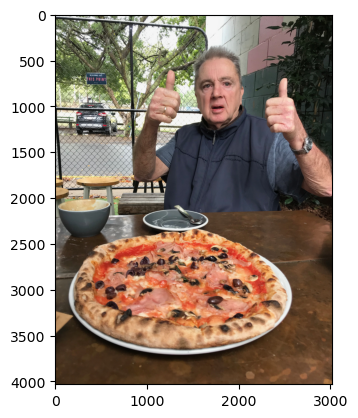

In [264]:
plt.imshow(custom_image.permute(1,2,0))
custom_image.shape

### 11.2 Making a prediction on a custom image with a trained pytorch model

In [283]:
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size = (64,64))
])
custom_image_transformed = custom_image_transform(custom_image)

In [284]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

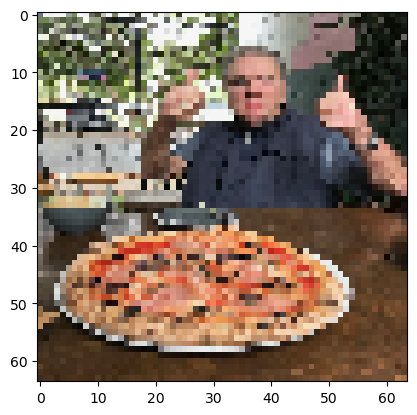

In [285]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [286]:
custom_image_transformed.shape
custom_image_transformed = custom_image_transformed.unsqueeze(0)

In [290]:
# Try to make a prediction on an image in uint8 format
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))
class_names[custom_image_pred.softmax(dim=1).argmax(dim=1)]

'pizza'

In [291]:
class_image_pred_probs = torch.softmax(custom_image_pred,dim=1)
class_image_pred_probs

tensor([[0.3675, 0.3003, 0.3322]], device='cuda:0')

### 11.3 Putting custom image prediction together : building a function

Ideal outcome : 

A function where we pass an image path to and have our model predict on that image, and plot image + prediction.

In [308]:
def pred_and_plot_image(model:torch.nn.Module, image_path: str, class_names: List[str] = None,
                        transform = None, device = device):
    # load in the image
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # devide the image pixel values by 255 to normalize.
    target_image /= 255.

    # Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # Make sure the model is on the target device
    model.to(device)

    # Turn on eval context
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(0)

        # Make a prediction on the image with an extra dimension
        target_image_pred = model(target_image.to(device))
        target_image_pred_prob = target_image_pred.softmax(dim=1)
        target_image_pred_label = target_image_pred_prob.argmax(dim=1)

        # plot the image alongside the prediction and prediction probability
        plt.imshow(target_image.squeeze().permute(1,2,0))
        if class_names:
            title = f"Pred : {class_names[target_image_pred_label.cpu().item()]} | Prob : {target_image_pred_prob.max().cpu().item():.3f}"
        else:
            title = f"Pred : {target_image_pred_label.cpu().item()} | Prob : {target_image_pred_prob.max().cpu().item():.3f}"
        plt.title(title)
        plt.axis(False)


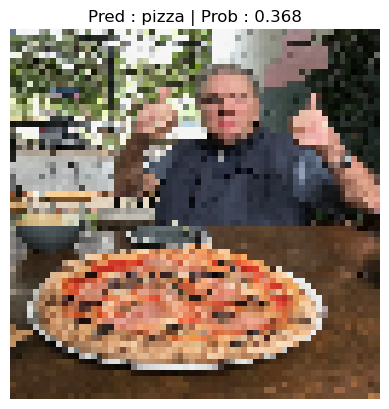

In [310]:
pred_and_plot_image(model = model_1, image_path=custom_image_path, class_names=class_names, transform=custom_image_transform,
                    device=device )